In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [86]:
stores_train = pd.read_csv("../data/stores_train.csv")
stores_test = pd.read_csv("../data/stores_test.csv")

In [87]:
lon_train = stores_train["lon"].values
lat_train = stores_train["lat"].values

lon_test = stores_test["lon"].values
lat_test = stores_test["lat"].values

In [88]:
# Changing from degrees to radians
#lon_train = np.radians(lon_train)
#lat_train = np.radians(lat_train)
#print(lon_train)
#print(lat_train)

<function matplotlib.pyplot.show(close=None, block=None)>

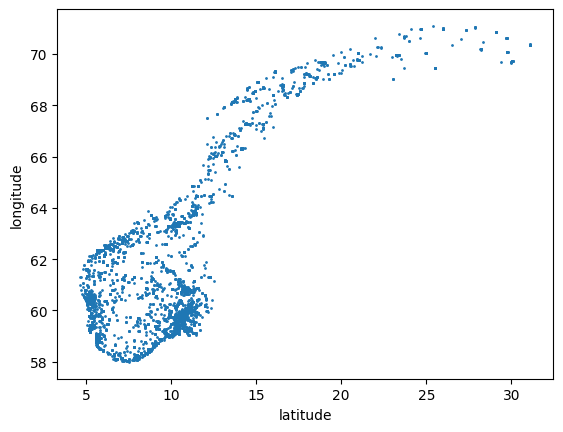

In [89]:
plt.scatter(lon_train,lat_train, s=1)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show

In [90]:
X = np.vstack((lat_train, lon_train)).T
print(X)

[[59.74310406 10.20492789]
 [59.91375942 10.73403076]
 [60.16475057 10.25465589]
 ...
 [59.94656242 11.00765941]
 [58.85026136  5.73567433]
 [69.67042225 19.04265947]]


In [91]:
kmeans = KMeans(n_clusters=100, random_state=0)
labels = kmeans.fit_predict(X)

In [92]:
print(labels)
filtered_labels0 = X[labels == 0]

[15  4 91 ... 65 83 22]


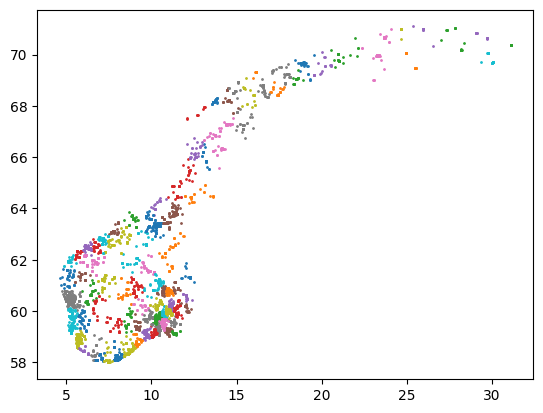

In [93]:
#Initialize the class object
kmeans = KMeans(n_clusters = 100)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 1], X[label == i , 0], label = i, s=1)
plt.show()

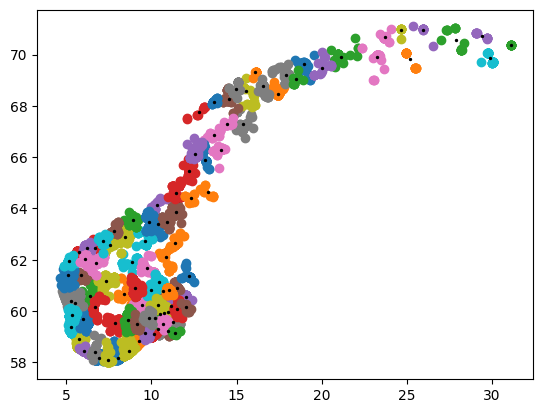

In [94]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 1], X[label == i , 0],  label = i)
plt.scatter(centroids[:,1], centroids[:,0], s = 2, color = 'k')
plt.show()

# For test:

In [100]:
X2 = np.vstack((lat_test, lon_test)).T

In [103]:
label2 = kmeans.predict(X2)
len(label2)
print(label2)

[19 54 68 ... 68  7 11]


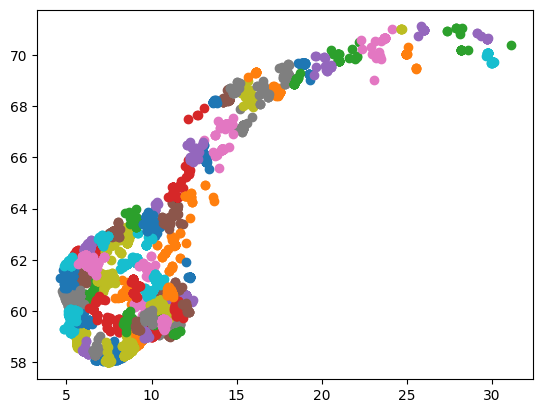

In [102]:
for i in u_labels:
    plt.scatter(X2[label2 == i, 1], X2[label2 == i, 0], label = 1)
plt.show()

# Making CSV files:

In [104]:
features_train = pd.DataFrame()

features_train["categorical_lon_lat_clustering"] = label
features_train.to_csv("../features_train_csv/categorical_lon_lat_clustering.csv", index=False)

In [105]:
features_test = pd.DataFrame()

features_test["categorical_lon_lat_clustering"] = label2
features_test.to_csv("../features_test_csv/categorical_lon_lat_clustering.csv", index=False)